# Курсовой проект

## Описание проекта
**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

## Обзор данных<a class="anchor" id="course_project_review"></a>
**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Пути к директориям и файлам**

In [47]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'
PREP_DATASET_PATH = './course_project_prep.csv'

In [49]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
# df = pd.read_csv(PREP_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [51]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

In [34]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### Проверка значений базовых признаков

In [128]:
for feature in BASE_FEATURE_NAMES:
    non_nan_count = df_train[feature].count()
    unique_values = df_train[feature].unique()
    if len(unique_values) > 20:
        unique_values_str = str(unique_values[:5]) + ' ... ' + str(unique_values[len(unique_values) - 5:])
    else:
        unique_values_str = str(unique_values)
    dataset_size = 7500
    print(f"\033[1m{feature}\033[0m")
    print(f"\t\033[1mUnique values:\033[0m\n\t{unique_values_str}")
    print(f"\t\033[1mFeature not NaN size:\033[0m {non_nan_count}")
    if non_nan_count == dataset_size:
        print(f"\033[95mПропусков нет\033[0m")
    elif non_nan_count / dataset_size > 0.9:
        print(f"\033[95mНемного пропусков\033[0m")
    else:
        print(f"\033[95mМного пропусков\033[0m")
    print('*' * 50)

Home Ownership
	Unique values:
	['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']
	Feature not NaN size: 7500
Пропусков нет
**************************************************
Annual Income
	Unique values:
	[ 482087. 1025487.  751412.  805068.  776264.] ... [5327372. 1368000. 2833185. 1257610.  402192.]
	Feature not NaN size: 5943
Много пропусков
**************************************************
Years in current job
	Unique values:
	[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
	Feature not NaN size: 7129
Немного пропусков
**************************************************
Tax Liens
	Unique values:
	[0. 3. 1. 2. 4. 6. 5. 7.]
	Feature not NaN size: 7500
Пропусков нет
**************************************************
Number of Open Accounts
	Unique values:
	[11. 15.  8. 13. 12.] ... [34. 38. 35. 37. 42.]
	Feature not NaN size: 7500
Пропусков нет
**************************************************
Years of Credit H

### Проверка значений столбца [Home Ownership](#course_project_review)  (домовладение)

In [36]:
df_train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

In [37]:
# Пропусков нет

**Преобразуем в dummies**

In [38]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Home Ownership'])], axis=1)
df_train.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default', 'Have Mortgage', 'Home Mortgage',
       'Own Home', 'Rent'],
      dtype='object')

### Проверка значений столбца [Annual Income](#course_project_review)  (годовой доход)

In [103]:
print(f"Unique values: {df_train['Annual Income'].unique()}")
print(f"Feature not NaN size: {df_train['Annual Income'].count()}")
# df_train.loc[(df_train['Tax Liens'] > 0),'Annual Income']

Unique values: [ 482087. 1025487.  751412. ... 2833185. 1257610.  402192.]
Feature not NaN size: 5943


In [153]:
# Преобразований скорее всего не требуется, minmax значения в пределах нормы. 
# Много пропусков

### Проверка значений столбца [Tax Liens](#course_project_review)  (налоговые обременения)

In [40]:
print(f"Unique values: {df_train['Tax Liens'].unique()}")
print(f"Feature not NaN size: {df_train['Tax Liens'].count()}")

array([0., 3., 1., 2., 4., 6., 5., 7.])

In [ ]:
# Пропусков нет

### Проверка значений столбца [Years in current job](#course_project_review)  (количество лет на текущем месте работы)

In [154]:
df_train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [155]:
# Надо подумать как заменить значения (0;1) и 10+ на integer
# Немного пропусков

### Проверка значений столбца [Number of Open Accounts](#course_project_review)  (количество открытых аккаунтов)

In [156]:
df_train['Number of Open Accounts'].unique()

array([11., 15.,  8., 13., 12.,  9., 17., 10.,  7.,  6., 14.,  3., 20.,
       19., 22., 18.,  5., 16.,  4.,  2., 23., 24., 21., 25., 32., 33.,
       31., 30., 29., 28., 26., 27., 43., 41., 34., 38., 35., 37., 42.])

In [157]:
# Надо преобразовать в integer

### Проверка значений столбца [Years of Credit History](#course_project_review)  (количество лет кредитной истории)

In [158]:
df_train['Years of Credit History'].head()

0    26.3
1    15.3
2    35.0
3    22.5
4    13.6
Name: Years of Credit History, dtype: float64

In [159]:
# Значения в основном дробные, преобразований скорее всего не нужно
# Пропусков нет

#### Проверка значений столбца [Maximum Open Credit](#course_project_review)  (наибольший открытый кредит)

In [160]:
df_train['Maximum Open Credit'].unique()

array([ 685960., 1181730., 1182434., ..., 1778920., 1141250.,  480832.])

In [161]:
# Преообразовать в Integer
# Пропусков нет

#### Проверка значений столбца [Number of Credit Problems](#course_project_review)  (количество проблем с кредитом)

In [162]:
df_train['Number of Credit Problems'].unique()

array([1., 0., 3., 2., 6., 4., 5., 7.])

In [163]:
# Преообразовать в Integer
# Пропусков нет

#### Проверка значений столбца [Months since last delinquent](#course_project_review)  (количество месяцев с последней просрочки платежа)

In [164]:
df_train['Months since last delinquent'].unique()

array([ nan,  73.,  18.,   6.,  40.,  44.,  45.,  17.,  61.,  14.,  11.,
        32.,  75.,  65.,  10.,  28.,  35.,  29.,  13.,   8.,  71.,  54.,
        21.,  68.,  51.,  70.,  19.,  22.,  16.,  38.,  36.,   0.,  34.,
        30.,   3.,  52.,  72.,  63.,  23.,   5.,  60.,  59.,   1.,  74.,
         4.,  42.,  39.,  41.,  55.,  67.,  37.,  47.,  26.,  76.,  43.,
        12.,   7.,  77.,  48.,  79.,  80.,  31.,  64.,  78.,  20.,  58.,
        49.,   9.,  69.,  25.,  33.,  15.,  57.,  86.,  62.,   2.,  24.,
        56.,  82.,  66.,  46.,  27.,  50.,  53.,  81.,  83., 118.,  84.,
        91.,  92.])

In [165]:
# Преообразовать в Integer
# Много пропусков

#### Проверка значений столбца [Bankruptcies](#course_project_review)  (банкротства)

In [166]:
df_train['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

In [167]:
# Преообразовать в Integer
# Немного пропусков

#### Проверка значений столбца [Purpose](#course_project_review)  (цель кредита)

In [168]:
df_train['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [169]:
# Преообразований не требуется
# Пропусков нет

#### Проверка значений столбца [Term](#course_project_review)  (срок кредита)

In [170]:
df_train['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [171]:
# Преобразовать в 0 и 1
# Пропусков нет

#### Проверка значений столбца [Current Loan Amount](#course_project_review)  (текущая сумма кредита)

In [172]:
df_train['Current Loan Amount'].unique()

array([9.9999999e+07, 2.6496800e+05, 1.2139600e+05, ..., 4.4404800e+05,
       6.1527400e+05, 2.6928000e+04])

In [173]:
# Значения 9.9999999e+07 выглядят странно, таких значений много.
# Пропусков нет

#### Проверка значений столбца [Current Credit Balance](#course_project_review)  (текущий кредитный баланс)

In [174]:
df_train['Current Credit Balance'].unique()

array([ 47386., 394972., 308389., ..., 477812., 476064., 288192.])

In [175]:
# Все значения целые, можно преобразовать в integer
# Пропусков нет

#### Проверка значений столбца [Monthly Debt](#course_project_review)  (ежемесячный долг)

In [176]:
df_train['Monthly Debt'].unique()

array([ 7914., 18373., 13651., ..., 12479., 37118.,  9061.])

In [177]:
# Все значения целые, можно преобразовать в integer
# Пропусков нет

#### Проверка значений столбца [Credit Default](#course_project_review) (факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка))

In [178]:
df_train['Credit Default'].unique()

array([0, 1])

#### Проверка значений столбца [Credit Score](#course_project_review) (кредитный рейтинг)

In [179]:
df_train.loc[df_train['Credit Score'] > 1245].shape

(400, 17)

In [180]:
# Пределы кредитного рейтинга у различных КБ отличаются, но максимальный размах, найденный мной [0, 1245].
# В 400 запиясях кредитный рейтинг выше
# Много пропусков

## Матрица корреляций

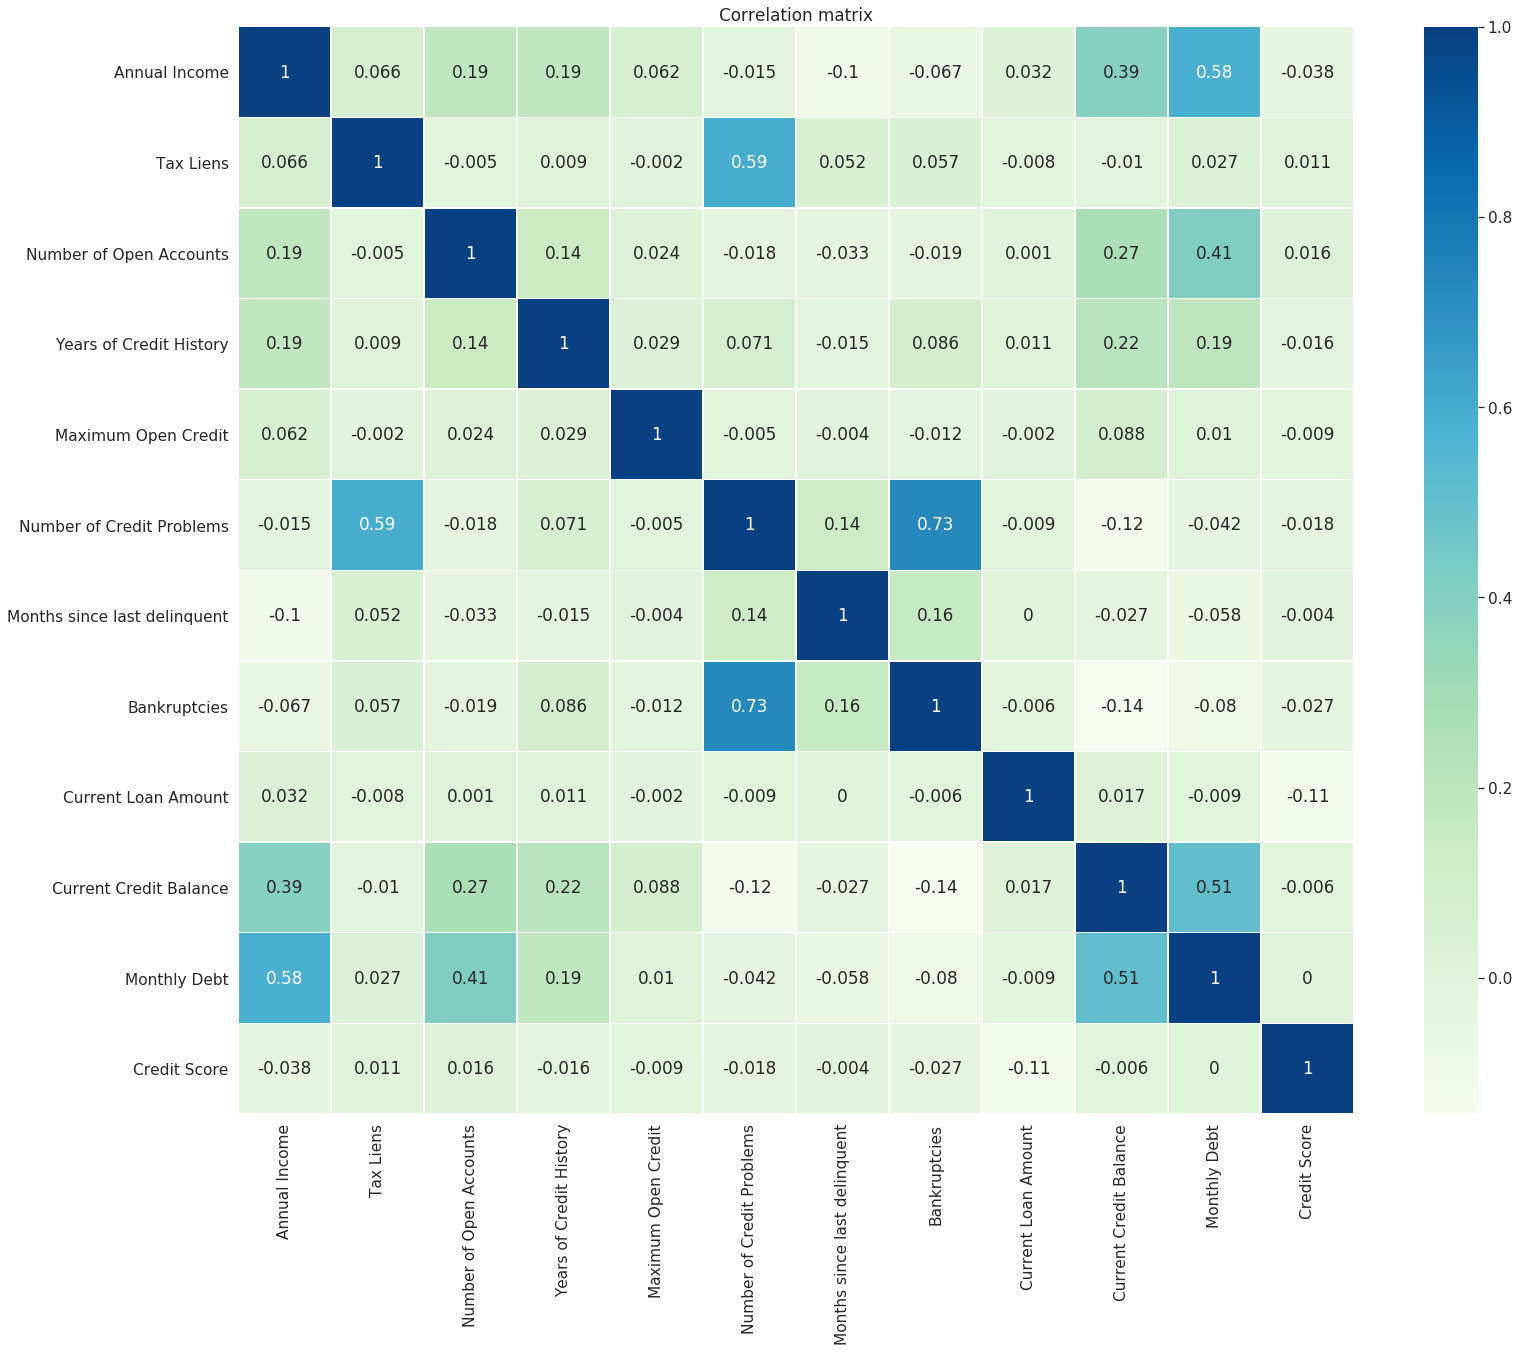

In [82]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()